# Первая Лабораторная работа

#### Устанавливаем зависимости и подключаем библиотеки

In [1]:
# !pip install pandas matplotlib pyarrow

In [2]:
import csv
import math
import pandas
import matplotlib
from typing import Dict

#### Считываем и сортируем данные

In [3]:
csvfile = open('data/r1z1.csv', 'r', newline='')
csvReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
rowData = [''.join(row) for row in csvReader][1:]
sortedData = list(map(float,rowData))
sortedData.sort()
frame = pandas.DataFrame(sortedData)

#### Вычисляем необходимую информацию о выборке

In [4]:
results: Dict[str, float] = {}

results['selectionLength'] = len(sortedData)
results['minElement'] = min(sortedData)
results['maxElement'] = max(sortedData)
results['selectionRange'] = results['maxElement'] - results['minElement']
results['mean'] = round(sum(sortedData)/results['selectionLength'],2)
results['meanByPandas'] = round(frame.mean().values[0],2)
expr = (results['selectionLength']-1)/2
results['median'] = sortedData[int(expr)+1] if expr==int(expr) else (sortedData[int(expr)+1] + sortedData[int(expr)+2])/2
results['medianByPandas'] = round(frame.median().values[0],2)
results['absoluteMeanDeviation'] = round(sum([x-results['mean'] for x in sortedData])/results['selectionLength'],3)
results['dispersion'] = round(sum([(x-results['mean'])**2 for x in sortedData])/(results['selectionLength']-1),2)
results['standardDeviation'] = round(math.sqrt(results['dispersion']),2)
results['asymmetryCoefficient'] = round(sum([(x-results['mean'])**3 for x in sortedData])/(results['selectionLength']*results['standardDeviation']**3),2)

In [5]:
def getQuartile(data: list[float], n: float, param: float) -> float:
    expr = (n - 1) * param
    return data[expr+1] if expr==int(expr) else (data[int(expr)+1] + data[int(expr)+2])/2
results['firstQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.25)
results['thirdQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.75)
results['interquartileLatitude'] = results['thirdQuartile'] - results['firstQuartile']

In [6]:
barData = {}
barData['intervalsCount'] = int(results['selectionLength']/10)
barData['step'] = round(results['selectionRange']/barData['intervalsCount'],2)
# dataVariata = {value:rowData.count(value) for value in rowData}
results['barData'] = barData

#### Выводим числовые данные

In [7]:
print(f'Объем выборки - {results["selectionLength"]}')
print(f'Выборочное среднее - {results["mean"]}, Медиана - {results["median"]}, Абсолютно среднее отклонение - {results["absoluteMeanDeviation"]}')
print(f'Дисперсия - {results["dispersion"]}, Стандартное отклонение - {results["standardDeviation"]}, Коэф. Ассиметрии - {results["asymmetryCoefficient"]}')
print(f'Минимальный элемент - {results["minElement"]}, Максимальный элемент - {results["maxElement"]}, Размах - {results["selectionRange"]}')
print(f'Первая квартиль - {results["firstQuartile"]}, Третья квартиль - {results["thirdQuartile"]}, Интерквартильная Широта - {results["interquartileLatitude"]}')

Объем выборки - 92
Выборочное среднее - 121.0, Медиана - 121.4, Абсолютно среднее отклонение - -0.002
Дисперсия - 8.04, Стандартное отклонение - 2.84, Коэф. Ассиметрии - -0.7
Минимальный элемент - 110.5, Максимальный элемент - 126.5, Размах - 16.0
Первая квартиль - 119.1, Третья квартиль - 123.1, Интерквартильная Широта - 4.0


#### График распределения

<Axes: >

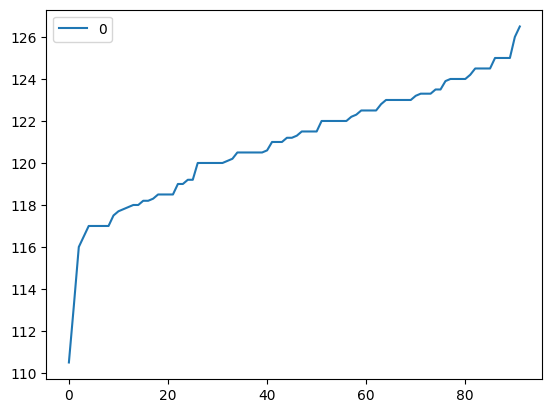

In [8]:
frame.plot()

#### Ящик с усами

<Axes: >

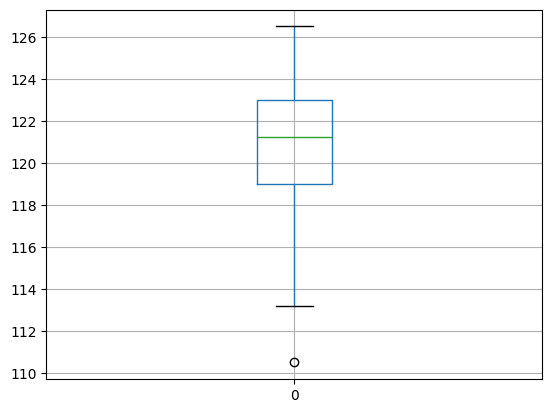

In [9]:
frame.boxplot()

#### Частотная гистограмма

In [10]:
# график

#### Вероятностная гистограмма

In [11]:
# график

#### Эмпирическая функция распределения

In [ ]:
# ЭФР